<a href="https://colab.research.google.com/github/JoonYoung-Sohn/practice/blob/master/FastAI_backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrix multiplication

In [1]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
from keras.datasets import mnist
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train,y_train,x_test,y_test = map(tensor, (x_train,y_train,x_test,y_test))
x_train = torch.reshape(x_train, shape=[x_train.shape[0],x_train.shape[1]*x_train.shape[2]])
x_test = torch.reshape(x_test, shape=[x_test.shape[0],x_test.shape[1]*x_test.shape[2]])

In [4]:
#n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8),
 torch.Size([60000, 784]),
 tensor([5, 0, 4,  ..., 5, 6, 8], dtype=torch.uint8),
 torch.Size([60000]),
 tensor(0, dtype=torch.uint8),
 tensor(9, dtype=torch.uint8))

In [5]:
mpl.rcParams['image.cmap'] = 'gray'

In [6]:
img = x_train[0]
img.view(28,28).type()

'torch.ByteTensor'

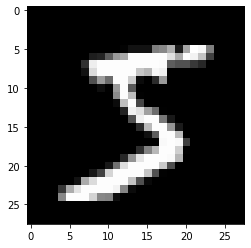

In [7]:
plt.imshow(img.view((28,28)));

In [8]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [9]:
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

In [10]:
m1 = x_test[:5]
m2 = weights
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [11]:
%time t1=matmul(m1, m2)

CPU times: user 1.13 s, sys: 0 ns, total: 1.13 s
Wall time: 1.14 s


In [12]:
t1.shape

torch.Size([5, 10])

In [13]:
len(x_train)

60000

In [14]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [15]:
%timeit -n 10 _=matmul(m1, m2)

10 loops, best of 3: 1.58 ms per loop


Fully connected

In [16]:
def normalize(x, m, s): return (x-m)/s

In [17]:
train_mean,train_std = x_train.float().mean(),x_train.float().std()
train_mean,train_std

(tensor(33.3184), tensor(78.5675))

In [18]:
x_train = normalize(x_train, train_mean, train_std)
x_test = normalize(x_test, train_mean, train_std)

In [19]:
train_mean,train_std = x_train.mean(),x_train.std()
train_mean,train_std

(tensor(1.8892e-08), tensor(1.))

In [20]:
n,m = x_train.shape
c = y_train.max()+1
n,m,c

(60000, 784, tensor(10, dtype=torch.uint8))

In [21]:
# num hidden
nh = 50

In [22]:
# standard xavier init
w1 = torch.randn(m,nh)/math.sqrt(m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1)

In [23]:
def test_near_zero(a,tol=1e-3): assert a.abs()<tol, f"Near zero: {a}"

In [24]:
test_near_zero(w1.mean())
test_near_zero(w1.std()-1/math.sqrt(m))

In [25]:
x_test.mean(),x_test.std()

(tensor(0.0060), tensor(1.0077))

In [26]:
def lin(x, w, b): return x@w + b

In [27]:
t = lin(x_test, w1, b1)

In [28]:
t.mean(),t.std()

(tensor(0.0837), tensor(1.0110))

In [29]:
def relu(x): return x.clamp_min(0.)

In [30]:
t = relu(lin(x_test, w1, b1))

In [31]:
t.mean(),t.std()

(tensor(0.4416), tensor(0.6193))

In [32]:
w1 = torch.randn(m,nh)*math.sqrt(2/m)

In [33]:
w1.mean(),w1.std()

(tensor(0.0003), tensor(0.0506))

In [34]:
t = relu(lin(x_test, w1, b1))
t.mean(),t.std()

(tensor(0.5803), tensor(0.8495))

In [35]:
from torch.nn import *

In [36]:
w1 = torch.zeros(m,nh)
init.kaiming_normal_(w1, mode='fan_out')
t = relu(lin(x_test, w1, b1))

In [37]:
init.kaiming_normal_ # He initialization ??

<function torch.nn.init.kaiming_normal_>

In [38]:
w1.mean(),w1.std()

(tensor(-0.0002), tensor(0.0506))

In [39]:
t.mean(),t.std()

(tensor(0.5371), tensor(0.8170))

In [40]:
torch.nn.Linear(m,nh).weight.shape

torch.Size([50, 784])

In [41]:
torch.nn.Linear.forward

<function torch.nn.modules.linear.Linear.forward>

In [42]:
torch.nn.functional.linear

<function torch.nn.functional.linear>

In [43]:
torch.nn.Conv2d

torch.nn.modules.conv.Conv2d

In [44]:
torch.nn.modules.conv._ConvNd.reset_parameters

<function torch.nn.modules.conv._ConvNd.reset_parameters>

In [45]:
def model(xb):
    l1 = lin(xb, w1, b1)
    l2 = relu(l1)
    l3 = lin(l2, w2, b2)
    return l3

In [46]:
%timeit -n 10 _=model(x_test)

10 loops, best of 3: 21.3 ms per loop


In [47]:
assert model(x_test).shape==torch.Size([x_test.shape[0],1])

In [48]:
model(x_test).shape

torch.Size([10000, 1])

In [49]:
def mse(output, targ):
  return (output.squeeze(-1) - targ).pow(2).mean()

In [50]:
y_train,y_test = y_train.float(),y_test.float()

In [51]:
preds = model(x_train)

In [52]:
preds.shape

torch.Size([60000, 1])

In [53]:
mse(preds, y_train)

tensor(23.6688)

In [54]:
def mse_grad(inp, targ): 
  # grad of loss with respect to output of previous layer
  inp.g = 2. * (inp.squeeze() - targ).unsqueeze(-1) / inp.shape[0]

In [55]:
def relu_grad(inp, out):
  # grad of relu with respect to input activations
  inp.g = (inp>0).float() * out.g

In [57]:
def lin_grad(inp, out, w, b):
  # grad of matmul with respect to input
  inp.g = out.g @ w.t()
  w.g = (inp.unsqueeze(-1) * out.g.unsqueeze(1)).sum(0)
  b.g = out.g.sum(0)

In [58]:
def forward_and_backward(inp, targ):
  # forward pass:
  l1 = inp @ w1 + b1
  l2 = relu(l1)
  out = l2 @ w2 + b2
  # we don't actually need the loss in backward!
  loss = mse(out, targ)
    
  # backward pass:
  mse_grad(out, targ)
  lin_grad(l2, out, w2, b2)
  relu_grad(l1, l2)
  lin_grad(inp, l1, w1, b1)

In [59]:
forward_and_backward(x_train, y_train)

In [60]:
# Save for testing against later
w1g = w1.g.clone()
w2g = w2.g.clone()
b1g = b1.g.clone()
b2g = b2.g.clone()
ig  = x_train.g.clone()

In [61]:
xt2 = x_train.clone().requires_grad_(True)
w12 = w1.clone().requires_grad_(True)
w22 = w2.clone().requires_grad_(True)
b12 = b1.clone().requires_grad_(True)
b22 = b2.clone().requires_grad_(True)

In [62]:
def forward(inp, targ):
    # forward pass:
    l1 = inp @ w12 + b12
    l2 = relu(l1)
    out = l2 @ w22 + b22
    # we don't actually need the loss in backward!
    return mse(out, targ)

In [63]:
loss = forward(xt2, y_train)
loss.backward()

In [64]:
print(w22.grad, w2g)
print(b22.grad, b2g)
print(w12.grad, w1g)
print(b12.grad, b1g)
print(xt2.grad, ig )

tensor([[ -6.8111],
        [ -3.8583],
        [ -0.4792],
        [ -7.8335],
        [ -9.9291],
        [ -0.4548],
        [-10.4482],
        [ -2.3362],
        [ -4.6933],
        [ -6.9077],
        [ -6.3426],
        [ -3.5235],
        [ -1.6149],
        [ -1.8818],
        [ -9.1825],
        [ -2.5069],
        [ -2.5233],
        [ -0.8916],
        [ -3.8573],
        [ -5.3559],
        [ -4.5766],
        [ -2.6755],
        [ -3.0950],
        [ -2.3415],
        [ -3.8768],
        [ -3.5106],
        [ -1.8309],
        [ -4.0217],
        [ -0.5887],
        [ -4.7240],
        [ -1.6670],
        [ -6.4564],
        [ -3.8145],
        [ -4.2259],
        [ -1.1636],
        [ -1.3491],
        [ -1.0291],
        [ -4.5624],
        [ -3.8598],
        [ -0.8217],
        [-12.2814],
        [ -4.1777],
        [ -4.9372],
        [ -3.3004],
        [ -3.8185],
        [ -1.1065],
        [ -3.1514],
        [ -5.8636],
        [ -5.4695],
        [ -0.1816]])

Layer as class

In [66]:
class Relu():
    def __call__(self, inp):
        self.inp = inp
        self.out = inp.clamp_min(0.)-0.5
        return self.out
    
    def backward(self):
        self.inp.g = (self.inp>0).float() * self.out.g

In [67]:
class Lin():
    def __init__(self, w, b):
        self.w,self.b = w,b
        
    def __call__(self, inp):
        self.inp = inp
        self.out = inp@self.w + self.b
        return self.out
    
    def backward(self):
        self.inp.g = self.out.g @ self.w.t()
        # Creating a giant outer product, just to sum it, is inefficient!
        self.w.g = (self.inp.unsqueeze(-1) * self.out.g.unsqueeze(1)).sum(0)
        self.b.g = self.out.g.sum(0)

In [68]:
class Mse():
    def __call__(self, inp, targ):
        self.inp = inp
        self.targ = targ
        self.out = (inp.squeeze() - targ).pow(2).mean()
        return self.out
    
    def backward(self):
        self.inp.g = 2. * (self.inp.squeeze() - self.targ).unsqueeze(-1) / self.targ.shape[0]

In [70]:
class Model():
    def __init__(self, w1, b1, w2, b2):
        self.layers = [Lin(w1,b1), Relu(), Lin(w2,b2)]
        self.loss = Mse()
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x, targ)
    
    def backward(self):
        self.loss.backward()
        for l in reversed(self.layers):
            l.backward()

In [71]:
w1.g,b1.g,w2.g,b2.g = [None]*4
model = Model(w1, b1, w2, b2)

In [72]:
%time loss = model(x_train, y_train)

CPU times: user 152 ms, sys: 0 ns, total: 152 ms
Wall time: 159 ms


In [73]:
%time model.backward()

CPU times: user 4.13 s, sys: 8.36 s, total: 12.5 s
Wall time: 12.5 s


In [76]:
class Module():
    def __call__(self, *args):
        self.args = args
        self.out = self.forward(*args)
        return self.out
    
    def forward(self): raise Exception('not implemented')
    def backward(self): self.bwd(self.out, *self.args)

In [77]:
class Relu(Module):
    def forward(self, inp): return inp.clamp_min(0.)-0.5
    def bwd(self, out, inp): inp.g = (inp>0).float() * out.g

In [78]:
class Lin(Module):
    def __init__(self, w, b): self.w,self.b = w,b
        
    def forward(self, inp): return inp@self.w + self.b
    
    def bwd(self, out, inp):
        inp.g = out.g @ self.w.t()
        self.w.g = inp.t() @ out.g
        self.b.g = out.g.sum(0)

In [79]:
class Mse(Module):
    def forward (self, inp, targ): return (inp.squeeze() - targ).pow(2).mean()
    def bwd(self, out, inp, targ): inp.g = 2*(inp.squeeze()-targ).unsqueeze(-1) / targ.shape[0]

In [80]:
from torch import nn

class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        self.loss = mse
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x.squeeze(), targ)

In [81]:
model = Model(m, nh, 1)

In [82]:
%time loss = model(x_train, y_train)

CPU times: user 237 ms, sys: 0 ns, total: 237 ms
Wall time: 246 ms


In [83]:
%time loss.backward()

CPU times: user 93.6 ms, sys: 1.89 ms, total: 95.5 ms
Wall time: 96.1 ms
